# Bike Sharing Analysis
## by Meisam Ashraf

## Investigation Overview


In this investigation, I wanted to look at the data for bike sharink at the San Fransisco Area. The study can help in understanding the statistics and the model of system. The main focus was on the  duration of the bike trips, the time of usage and the user type: subscribed user or a casual customer.

The report addresses the following questions:

- When are most trips taken in terms of time of day, day of the week, or month of the year?<br>
- What are the trip duration statistics<br>
- The number of times the same bike is used throughout the year<br>
- Does the above depend on if a user is a subscriber or customer?<br>

## Dataset Overview

There are 519205 bike trips in the dataset with 14 features such as duration of the trip, hour, day, month and year of the usage and user type information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os
import random
import math
from datetime import datetime as dt
import time
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("df.csv")

In [5]:
# convert trip, hour, day, month and year into ordered categorical types
ordinal_var_dict = {'trip':['short','medium','long'],
                    'hour': [int(c) for c in range(0,24)],
                    'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'month': [int(c) for c in range(1,13)],
                    'year': [int(c) for c in range(2017,2021)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## Trip Duration Distribution

Based on the data set, the trip duration shows a right-skewed ditribution.

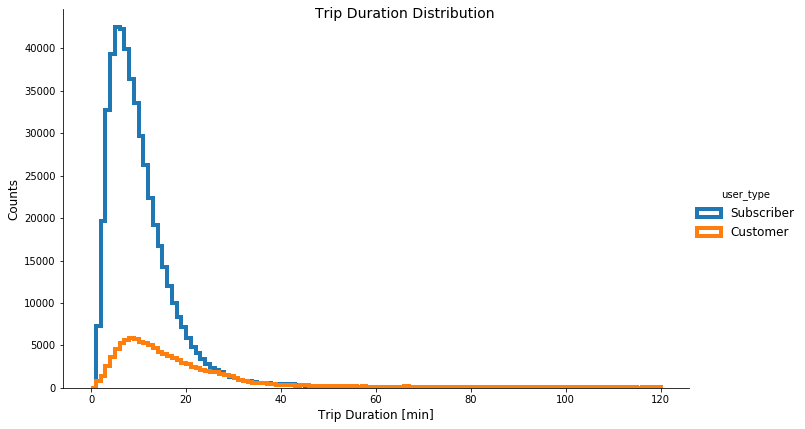

In [6]:
#plt.subplots_adjust(top=0.9);

ind = df.trip!='long'
dfp, v1,v2,nc, binsize = df[ind],'user_type','duration_min', 3, 1

#bin_edges = 10 ** np.arange(1.7, np.log10(dfp[v2].max())+log_binsize, log_binsize)
bin_edges= np.arange(0, dfp[v2].max()+ binsize, binsize);

g = sb.FacetGrid(data = df, hue = v1, height = 6, aspect=1.6);
g.map(plt.hist, v2, bins = bin_edges, histtype = 'step', lw=4);
g.add_legend(fontsize=12);
g.fig.suptitle('Trip Duration Distribution',fontsize=14);
g.axes[0,0].set_xlabel("Trip Duration [min]",fontsize=12);
g.axes[0,0].set_ylabel("Counts", fontsize=12);

## Bike Usage

From the bike ID information, we can trace how is the usage of the bikes distributed. Plotting the number of usage per bike ID shows that almost third of the bikes are used heavily through the two years period. The cruve is narrower for the regular subscribers.


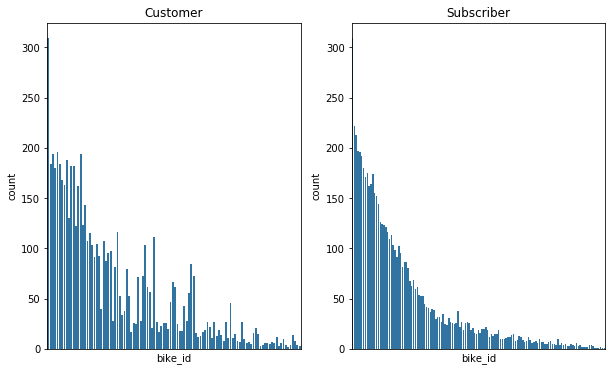

In [7]:
df_customer = df[df.user_type=='Customer']
df_subscriber = df[df.user_type=='Subscriber']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [10,6])
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
cat_order = df_customer.bike_id.value_counts()
index = range(0,cat_order.shape[0], 100)
g=sb.countplot(data=df, x='bike_id', color=base_color, order = cat_order.index[index])
g.set(xticks=[], title='Customer');

plt.subplot(1,2,2)
cat_order = df_subscriber.bike_id.value_counts()
index = range(0,cat_order.shape[0], 100)
g=sb.countplot(data=df, x='bike_id', color=base_color, order = cat_order.index[index], label='Subscriber')
g.set(xticks=[], title='Subscriber');

## Daily Usage of The Bikes

The plot shows that the subscribers use the bikes mostly in the early morning and evening and the customers are more leveled throughout the day.

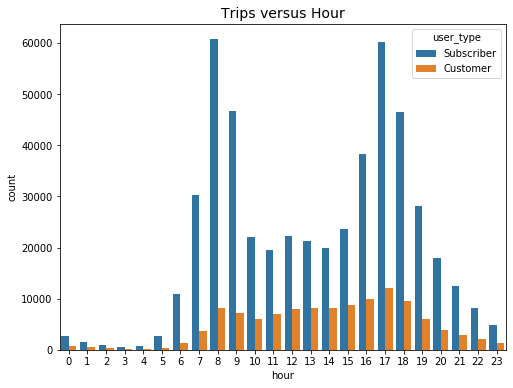

In [8]:
plt.figure(figsize = [8, 6])
sb.countplot(data = df, x = 'hour', hue = 'user_type').set_title('Trips versus Hour', fontsize=14);

## Subscription Trend
The trend for subscription over 2018-2019 is declining. This is while more customer usage can be seen as we move towards the end of 2019.

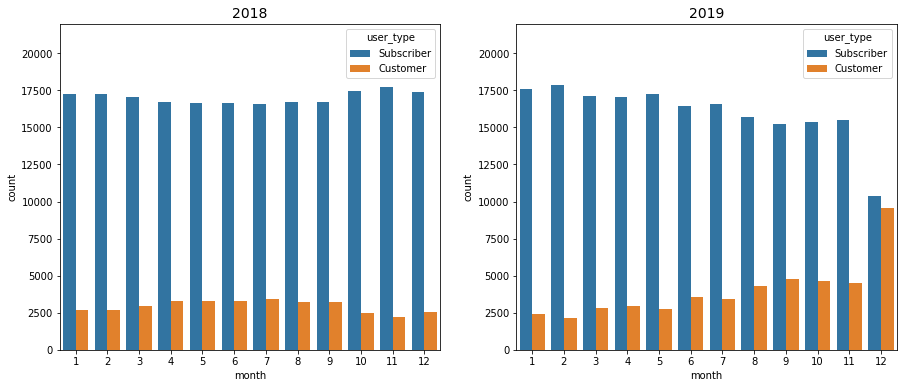

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [15,6])
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
sb.countplot(data = df[df.year==2018], x = 'month', hue = 'user_type');
plt.ylim([0,22000])
plt.title('2018',fontsize=14);

plt.subplot(1,2,2)
sb.countplot(data = df[df.year==2019], x = 'month', hue = 'user_type');
plt.ylim([0,22000])
plt.title('2019',fontsize=14);

## Bike Usage Over Day-Week-Year Scheme
The bikes sharing system is more frequently used in the morning and evening of working day times. While the numbers are fairly uniformly distrinuted along throughout the year, we see less usage at the end of the year.

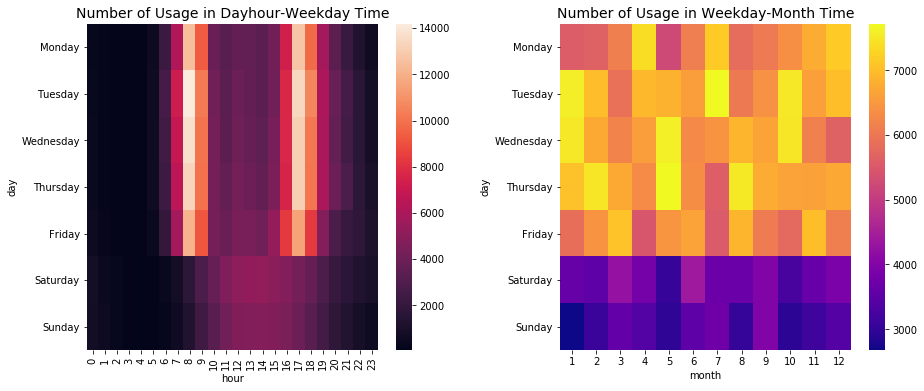

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [15,6])
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
v1,v2 = 'hour', 'day'
ct_counts = df.groupby([v1,v2]).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = v2, columns = v1, values = 'count')
sb.heatmap(ct_counts).set_title('Number of Usage in Dayhour-Weekday Time',fontsize=14);

plt.subplot(1,2,2)
v1,v2 = 'month', 'day'
df_ = df[df.year!=2017]
df_ = df_[df_.year!=2020]
ct_counts = df_.groupby([v1,v2]).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = v2, columns = v1, values = 'count')
sb.heatmap(ct_counts,cmap = 'plasma').set_title('Number of Usage in Weekday-Month Time',fontsize=14);

## Long Trips Trend

The long trips (longer than 2 hours) show a declining trend over time. This is more pronounced for the subscribed users than the casual customers.

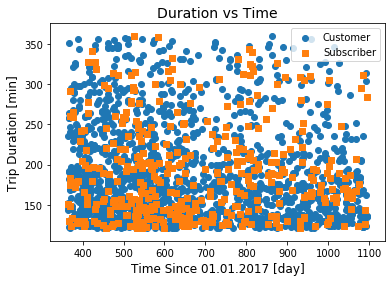

In [11]:
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

df_ = df[df.trip=='long']
df_ = df_[df_.year!=2017]
df_ = df_[df_.year!=2020]

for cat, marker in cat_markers:
    df_cat = df_[df_['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'time', y = 'duration_min', marker = marker);
plt.legend(['Customer','Subscriber']);
plt.title('Duration vs Time', fontsize=14);
plt.xlabel('Time Since 01.01.2017 [day]', fontsize=12);
plt.ylabel('Trip Duration [min]', fontsize=12);

## Trip Duration Across Day-Hour and User-Type

A dodged point plot for bike sharing duration in min shows the clear influence of day hours and user type on the trip duration average. Additionaly, there is a level difference in the duration time for customers which is about 10 mins. The error bars in the early morning ours is due to the lower number of points there.

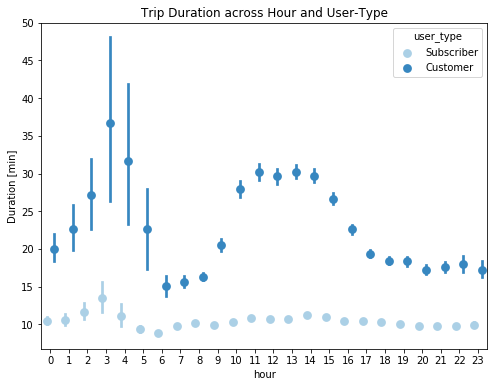

In [12]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'hour', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across Hour and User-Type')
plt.ylabel('Duration [min]')
#plt.yscale('log')
#plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

## Trip Duration Across Week-days and Months
And finally, the interesting trend observed for the months on the weekend show an increase and decreas. End of the year is declining dramatically in duration time.

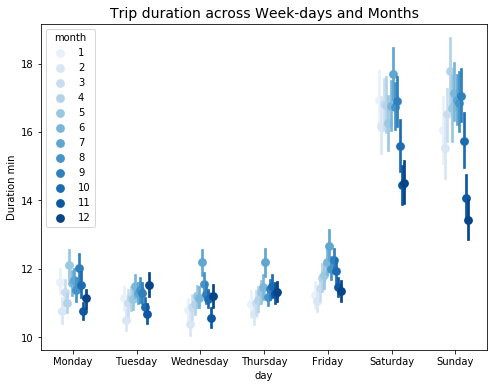

In [13]:
df_ = df[df.year!=2017]
df_ = df_[df_.year!=2020]

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_, x = 'day', y = 'duration_min', hue = 'month',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip duration across Week-days and Months', fontsize=14)
plt.ylabel('Duration min')
#plt.yscale('log')
#plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();